
# Two-Dataset Analysis & Merge (People Only)

This notebook analyzes and combines **`calories_data.csv`** and **`exercise.csv`** , then saves a unified dataset for modeling.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', 100)

DATA_PATH = Path(r"C:\Users\jakub\Desktop\CaloriesEstimator\data\calories_data.csv")
cal = pd.read_csv(DATA_PATH)

cal_shape = cal.shape
cal_cols = list(cal.columns)

print(f"Rows: {cal_shape[0]}, Columns: {cal_shape[1]}")
print("Columns:", cal_cols)
cal.head(10)


Rows: 15000, Columns: 10
Columns: ['user_id', 'gender', 'age', 'height', 'weight', 'duration', 'heart_rate', 'body_temp', 'user_id.1', 'calories']


,user_id,gender,age,height,weight,duration,heart_rate,body_temp,user_id.1,calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0
5,15130815,1,36,151.0,50.0,23.0,96.0,40.7,15130815,123.0
6,19602372,1,33,158.0,56.0,22.0,95.0,40.5,19602372,112.0
7,11117088,0,41,175.0,85.0,25.0,100.0,40.7,11117088,143.0
8,12132339,0,60,186.0,94.0,21.0,97.0,40.4,12132339,134.0
9,17964668,1,26,146.0,51.0,16.0,90.0,40.2,17964668,72.0


## Clean (remove duplicate user_id.1)

In [61]:

cal = cal.drop(columns=[c for c in ["user_id", "user_id.1"] if c in cal.columns])

print("After removing user_id columns:", cal.shape)
cal.head()

After removing user_id columns: (15000, 8)


,gender,age,height,weight,duration,heart_rate,body_temp,calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


### Quality checks

In [62]:
missing_cal = cal.isna().sum()
dup_rows = cal.duplicated().sum()

print("Missing values per column:\n", missing_cal)
print("\nDuplicate rows:", dup_rows)


Missing values per column:
 gender        0
age           0
height        0
weight        0
duration      0
heart_rate    0
body_temp     0
calories      0
dtype: int64

Duplicate rows: 1


## Quick EDA

In [63]:
cal.describe(include='all')

,gender,age,height,weight,duration,heart_rate,body_temp,calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Correlation Matrix

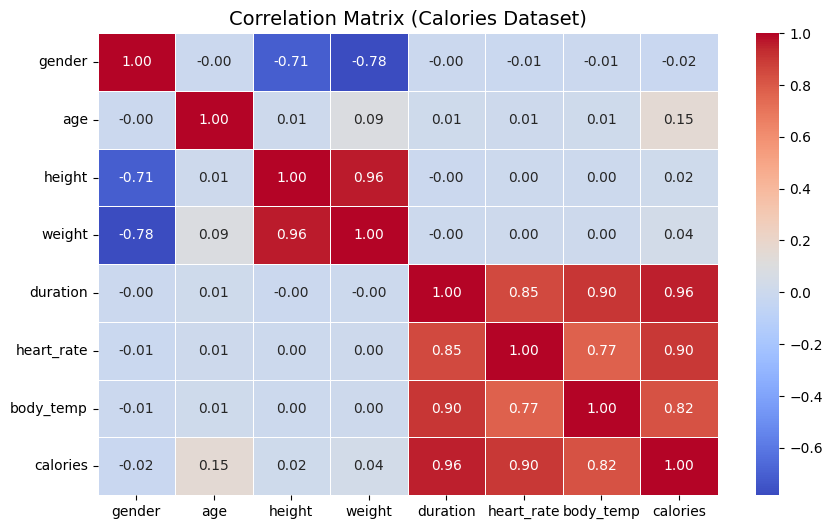

In [64]:

numeric_cols = cal.select_dtypes(include=["number"]).drop(columns=["user_id"], errors="ignore")
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Calories Dataset)", fontsize=14)
plt.show()


## Pairwise Relationships (Pairplot)

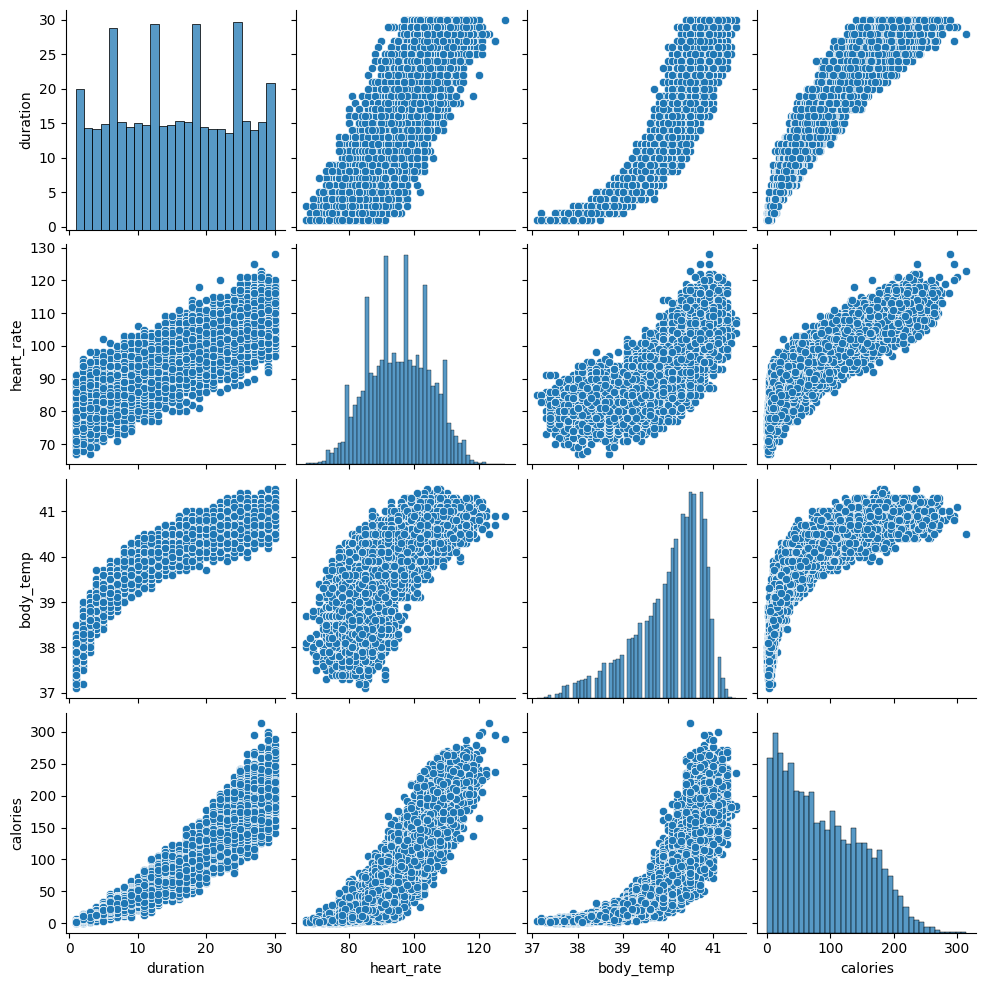

In [65]:
sns.pairplot(cal, vars=["duration", "heart_rate", "body_temp", "calories"])
plt.show()


## Calories vs Duration (Trend Analysis)

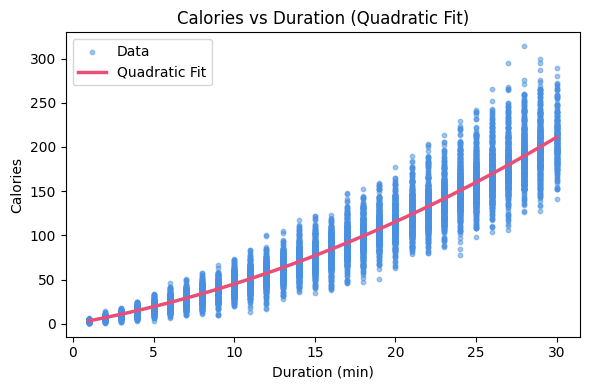

In [66]:
x = cal["duration"].to_numpy()
y = cal["calories"].to_numpy()

coef = np.polyfit(x, y, deg=2)
p = np.poly1d(coef)
xs = np.linspace(x.min(), x.max(), 300)
ys = p(xs)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, alpha=0.5, label="Data", color="#4a90e2")
plt.plot(xs, ys, linewidth=2.5, color="#e94e77", label="Quadratic Fit")
plt.xlabel("Duration (min)")
plt.ylabel("Calories")
plt.title("Calories vs Duration (Quadratic Fit)")
plt.legend()
plt.tight_layout()
plt.show()


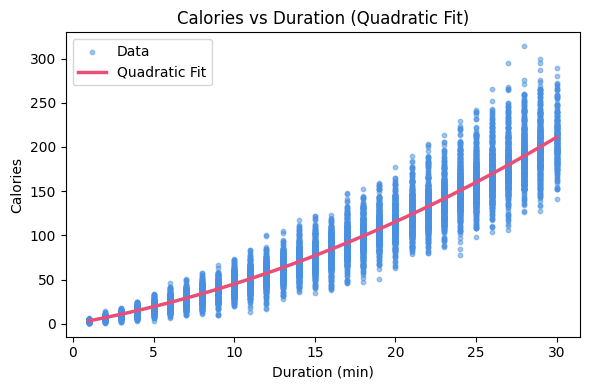

In [67]:
import numpy as np
import matplotlib.pyplot as plt

x = cal["duration"].to_numpy()
y = cal["calories"].to_numpy()

coef = np.polyfit(x, y, deg=2)
p = np.poly1d(coef)

xs = np.linspace(x.min(), x.max(), 300)
ys = p(xs)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, alpha=0.5, label="Data", color="#4a90e2")
plt.plot(xs, ys, linewidth=2.5, color="#e94e77", label="Quadratic Fit")
plt.xlabel("Duration (min)")
plt.ylabel("Calories")
plt.title("Calories vs Duration (Quadratic Fit)")
plt.legend()
plt.tight_layout()
plt.show()


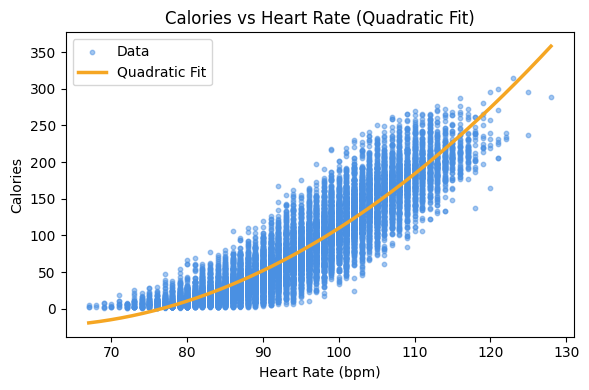

In [68]:
x = cal["heart_rate"].to_numpy()
y = cal["calories"].to_numpy()

coef = np.polyfit(x, y, deg=2)
p = np.poly1d(coef)

xs = np.linspace(x.min(), x.max(), 300)
ys = p(xs)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, alpha=0.5, label="Data", color="#4a90e2")
plt.plot(xs, ys, linewidth=2.5, color="#f5a623", label="Quadratic Fit")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Calories")
plt.title("Calories vs Heart Rate (Quadratic Fit)")
plt.legend()
plt.tight_layout()
plt.show()


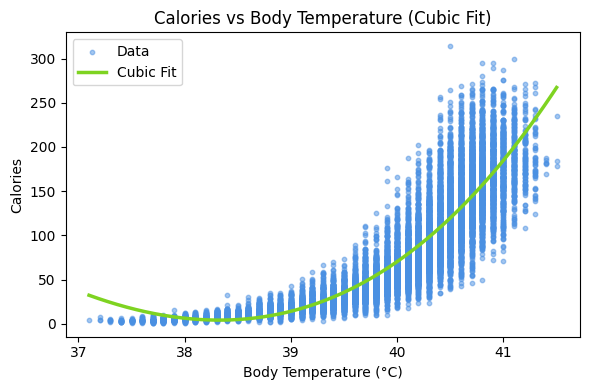

In [69]:
x = cal["body_temp"].to_numpy()
y = cal["calories"].to_numpy()

coef = np.polyfit(x, y, deg=3)
p = np.poly1d(coef)

xs = np.linspace(x.min(), x.max(), 300)
ys = p(xs)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=10, alpha=0.5, label="Data", color="#4a90e2")
plt.plot(xs, ys, linewidth=2.5, color="#7ed321", label="Cubic Fit")
plt.xlabel("Body Temperature (°C)")
plt.ylabel("Calories")
plt.title("Calories vs Body Temperature (Cubic Fit)")
plt.legend()
plt.tight_layout()
plt.show()


### Distributions

Shape: (225, 4)
Columns: ['Activity', 'Calories_130_lbs', 'Calories_155_lbs', 'Calories_190_lbs']


,Activity,Calories_130_lbs,Calories_155_lbs,Calories_190_lbs
0,"Aerobics, general",354,422,518
1,"Aerobics, high impact",413,493,604
2,"Aerobics, low impact",295,352,431
3,Archery (nonhunting),207,246,302
4,Automobile repair,177,211,259


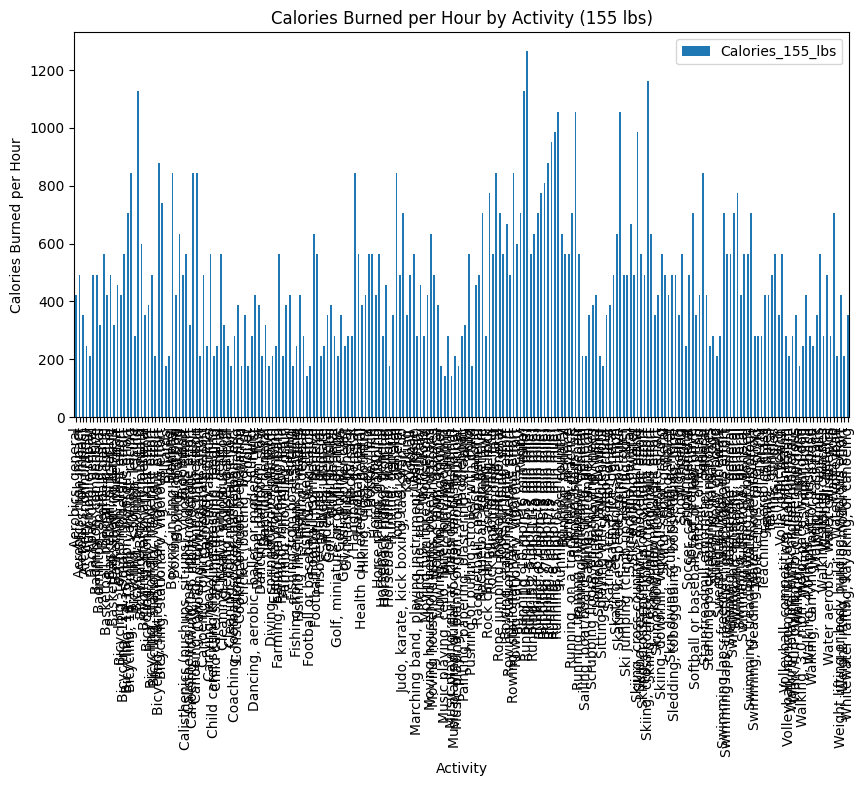

In [70]:
dhs = pd.read_csv(r"C:\Users\jakub\Desktop\CaloriesEstimator\data\calories_burned_per_hour_wisconsin_dhs.csv")

print("Shape:", dhs.shape)
print("Columns:", dhs.columns.tolist())
display(dhs.head())

# Optional: visualize how calories vary by activity
dhs.plot(kind="bar", x="Activity", y="Calories_155_lbs", figsize=(10,5))
plt.title("Calories Burned per Hour by Activity (155 lbs)")
plt.ylabel("Calories Burned per Hour")
plt.xlabel("Activity")
plt.show()


In [71]:
unique_activities = dhs["Activity"].unique()

for activity in unique_activities:
    print(activity)

Aerobics, general
Aerobics, high impact
Aerobics, low impact
Archery (nonhunting)
Automobile repair
Backpacking, general
Badminton, competitive
Badminton, social, general
Basketball, game
Basketball, nongame, general
Basketball, officiating
Basketball, shooting baskets
Basketball, wheelchair
Bicycling, 10-11.9mph, light effort
Bicycling, 12-13.9mph, moderate effort
Bicycling, 14-15.9mph, vigorous effort
Bicycling, 16-19mph, very fast, racing
Bicycling, <10mph, leisure
Bicycling, >20mph, racing
Bicycling, BMX or mountain
Bicycling, stationary, general
Bicycling, stationary, light effort
Bicycling, stationary, moderate effort
Bicycling, stationary, very light effort
Bicycling, stationary, very vigorous effort
Bicycling, stationary, vigorous effort
Billiards
Bowling
Boxing, in ring, general
Boxing, punching bag
Boxing, sparring
Broomball
Calisthenics (pushups, sit-ups), vigorous effort
Calisthenics, home, light/moderate effort
Canoeing, rowing, >6 mp h, vigorous effort
Canoeing, rowing, c

In [72]:
import re
import pandas as pd

# ---------- helper ----------
def norm(s: str) -> str:
    return re.sub(r"\s+", " ", str(s).strip().lower())

# ---------- explicit overrides ----------
overrides = {
    # High
    "aerobics, general": "High",
    "aerobics, high impact": "High",
    "backpacking, general": "High",
    "broomball": "High",
    "calisthenics (pushups, sit-ups), vigorous effort": "High",
    "dancing, aerobic, ballet or modern, twist": "High",
    "diving, springboard or platform": "High",
    "fencing": "High",
    "frisbee, ultimate": "High",
    "gymnastics, general": "High",
    "handball, general": "High",
    "handball, team": "High",
    "health club exercise, general": "High",
    "hiking, cross country": "High",
    "horse racing, galloping": "High",
    "jai alai": "High",
    "kickball": "High",
    "marching, rapidly, military": "High",
    "moto-cross": "High",
    "polo": "High",
    "rope jumping, fast": "High",
    "rope jumping, moderate, general": "High",
    "skating, ice, general": "High",
    "skating, ice, rapidly, > 9 mph": "High",
    "skating, ice, speed, competitive": "High",
    "skating, roller": "High",
    "sledding, tobogganing , bobsledding, luge": "High",
    "softball or baseball, fast or slow pitch": "High",
    "surfing, body or board": "High",
    "teaching aerobics class": "High",
    "wallyball, general": "High",
    "water polo": "High",
    # Low
    "aerobics, low impact": "Low",
    "calisthenics, home, light/moderate effort": "Low",
    "electrical work, plumbing": "Low",
    "frisbee playing, general": "Low",
    "hacky sack": "Low",
    "horseback riding, general": "Low",
    "horseback riding, trotting": "Low",
    "painting, papering, plastering, scraping": "Low",
    "raking lawn": "Low",
    "rope jumping, slow": "Low",
    "scrubbing floors, on hands and knees": "Low",
    "sitting-playing with children-light": "Low",
    "skating, ice, 9 mph or less": "Low",
    "softball, officiating": "Low",
    "standing-packing/unpacking boxes": "Low",
    "water aerobics, water calisthenics": "Low",
    "dancing, general": "Low",
}

# ---------- keyword patterns ----------
HIGH_PATTERNS = [
    r"\b(run\w*|jog\w*|sprint\w*)\b",
    r"\b(hiit|interval\w*|tabata|circuit\w*|boot ?camp|crossfit|plyometric\w*|burpee\w*)\b",
    r"\b(weight|lifting|powerlift\w*|strength|resistance|kettlebell|bench|deadlift\w*|squat\w*|barbell|dumbbell)\b",
    r"\b(boxing|wrestling|martial)\b",
    r"\b(basketball|soccer|football|hockey|rugby|lacrosse|squash|racquetball|tennis|badminton|volleyball)\b",
    r"\b(row\w*|rowing machine|erg)\b",
    r"\b(swim\w*|freestyle|butterfly|backstroke|breaststroke)\b",
    r"\b(climb\w*|boulder\w*|mountain\w*)\b",
    r"\b(cycl\w*|bicycl\w*|bike\w*|spin\w*)\b",
    r"\b(ski\w*|skate\w*|inline|rollerblad\w*)\b",
    r"\b(stair\w*|stepper|elliptical|jump ?rope|rope jump\w*|rope jumping)\b",
]

LOW_PATTERNS = [
    r"\b(walk\w*|stroll\w*)\b",
    r"\b(yoga|pilates|tai ?chi|stretch\w*|flexibil\w*)\b",
    r"\b(golf|archery|billiards|bowling|darts|shuffleboard|croquet|curling)\b",
    r"\b(fishing|hunting)\b",
    r"\b(clean\w*|sweep\w*|mop\w*|vacuum\w*|laundr\w*|cook\w*|dish\w*|shopping|carry\w*|moving|lift boxes)\b",
    r"\b(yard\w*|garden\w*|mow\w*|rake\w*|shovel\w*|dig\w*|plant\w*|weed\w*|snow\w*)\b",
    r"\b(repair\w*|carpentr\w*|construction|farming|farm\w*|household|automobile repair)\b",
    r"\b(music playing|cello|flute|horn|woodwind|drums|guitar|piano|organ|violin|trumpet)\b",
    r"\b(child care|pushing or pulling stroller|horse grooming)\b",
    r"\b(sail\w*|canoe\w*|kayak\w*|paddle\w*|snorkel\w*|scuba)\b",
]

MEDIUM_PATTERNS = [
    r"\b(moderate|moderately)\b",
    r"\b(general)\b",
    r"\b(average|normal|casual|recreational)\b",
]

# ---------- classifier ----------
def classify3(activity: str) -> str:
    n = norm(activity)

    # exact override first
    if n in overrides:
        return overrides[n]

    # special cases
    if "ballroom" in n and "fast" in n:  
        return "High"
    if "ballroom" in n and ("slow" in n or "general" in n):  
        return "Low"
    if "unicycl" in n: 
        return "High"

    # check Medium first
    if any(re.search(p, n) for p in MEDIUM_PATTERNS):
        return "Medium"

    # then High/Low patterns
    if any(re.search(p, n) for p in HIGH_PATTERNS):   
        return "High"
    if any(re.search(p, n) for p in LOW_PATTERNS):    
        return "Low"

    # fallback to Medium
    return "Medium"

# =========================================================
# A) NAME-BASED DATASET
# =========================================================
dhs_name = dhs.copy()
dhs_name["Demand3"] = dhs_name["Activity"].apply(classify3)

print("Name-based classes:")
print(dhs_name["Demand3"].value_counts(dropna=False).to_string())

# =========================================================
# B) CALORIES-BASED DATASET
# =========================================================
dhs_cal = dhs.copy()
cal_cols = [c for c in ["Calories_130_lbs","Calories_155_lbs","Calories_190_lbs"] if c in dhs_cal.columns]
if len(cal_cols) == 0:
    raise ValueError("No calories columns found. Expected Calories_130_lbs/155/190.")

dhs_cal["MeanCalories"] = dhs_cal[cal_cols].mean(axis=1)

# thresholds: bottom 1/3 = Low, middle 1/3 = Medium, top 1/3 = High
q1 = dhs_cal["MeanCalories"].quantile(1/3)
q2 = dhs_cal["MeanCalories"].quantile(2/3)

def by_calories(val: float) -> str:
    if val < q1:  
        return "Low"
    if val < q2:  
        return "Medium"
    return "High"

dhs_cal["Demand3"] = dhs_cal["MeanCalories"].apply(by_calories)

print("\nCalories-based classes:")
print(dhs_cal["Demand3"].value_counts(dropna=False).to_string())

# =========================================================
# PREVIEW OUTPUTS
# =========================================================
print("\nPreview (name-based):")
display(dhs_name[["Activity","Demand3"] + cal_cols].head(10))

print("\nPreview (calories-based):")
display(dhs_cal[["Activity","MeanCalories","Demand3"] + cal_cols].head(10))


Name-based classes:
Demand3
High      108
Low        77
Medium     40

Calories-based classes:
Demand3
High      78
Low       75
Medium    72

Preview (name-based):


,Activity,Demand3,Calories_130_lbs,Calories_155_lbs,Calories_190_lbs
0,"Aerobics, general",High,354,422,518
1,"Aerobics, high impact",High,413,493,604
2,"Aerobics, low impact",Low,295,352,431
3,Archery (nonhunting),Low,207,246,302
4,Automobile repair,Low,177,211,259
5,"Backpacking, general",High,413,493,604
6,"Badminton, competitive",High,413,493,604
7,"Badminton, social, general",Medium,266,317,388
8,"Basketball, game",High,472,563,690
9,"Basketball, nongame, general",Medium,354,422,518



Preview (calories-based):


,Activity,MeanCalories,Demand3,Calories_130_lbs,Calories_155_lbs,Calories_190_lbs
0,"Aerobics, general",431.333333,Medium,354,422,518
1,"Aerobics, high impact",503.333333,Medium,413,493,604
2,"Aerobics, low impact",359.333333,Medium,295,352,431
3,Archery (nonhunting),251.666667,Low,207,246,302
4,Automobile repair,215.666667,Low,177,211,259
5,"Backpacking, general",503.333333,Medium,413,493,604
6,"Badminton, competitive",503.333333,Medium,413,493,604
7,"Badminton, social, general",323.666667,Low,266,317,388
8,"Basketball, game",575.000000,High,472,563,690
9,"Basketball, nongame, general",431.333333,Medium,354,422,518


C:\Users\jakub\AppData\Local\Temp\ipykernel_21460\3105452116.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


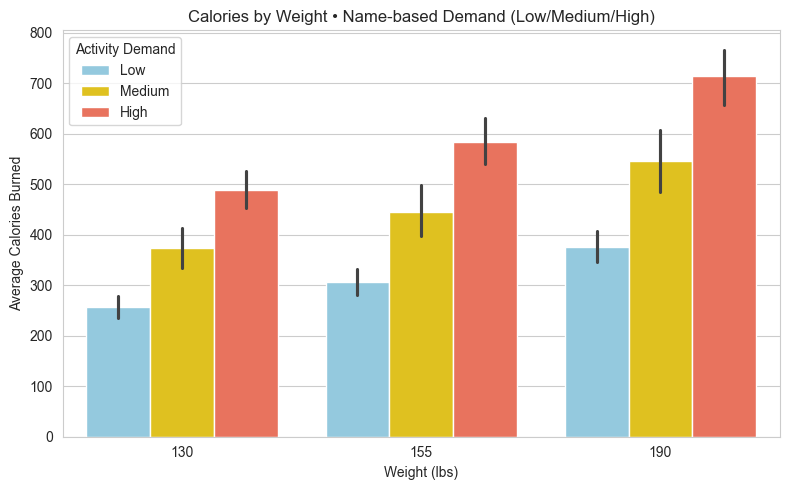

C:\Users\jakub\AppData\Local\Temp\ipykernel_21460\3105452116.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


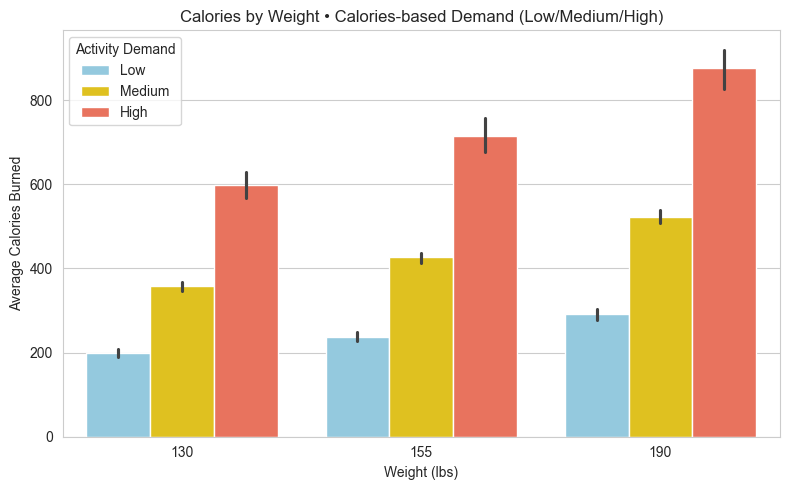

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style("whitegrid")

def plot_by_demand(df, demand_col, title):
    # 1) reshape Calories_130/155/190 → one Weight column
    calories_long = df.melt(
        id_vars=["Activity", demand_col],
        value_vars=["Calories_130_lbs", "Calories_155_lbs", "Calories_190_lbs"],
        var_name="Weight",
        value_name="Calories"
    )

    # 2) keep only the number from "Calories_130_lbs" → 130
    calories_long["Weight"] = calories_long["Weight"].str.extract(r"(\d+)").astype(int)

    # 3) palette for whichever levels are present
    #    (handles Low/Medium/High or just Low/High gracefully)
    possible = ["Low", "Medium", "High"]
    colors   = {"Low": "skyblue", "Medium": "gold", "High": "tomato"}
    hue_order = [lvl for lvl in possible if lvl in calories_long[demand_col].unique()]
    pal = {k: colors[k] for k in hue_order}

    # 4) plot
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=calories_long,
        x="Weight", y="Calories",
        hue=demand_col, hue_order=hue_order,
        estimator="mean", ci=95, palette=pal
    )
    plt.title(title)
    plt.xlabel("Weight (lbs)")
    plt.ylabel("Average Calories Burned")
    plt.legend(title="Activity Demand")
    plt.tight_layout()
    plt.show()

# ---- make both figures ----
# Name-based separation (uses dhs_name["Demand3"])
plot_by_demand(
    df=dhs_name.rename(columns={"Demand3": "Demand_Name"}),
    demand_col="Demand_Name",
    title="Calories by Weight • Name-based Demand (Low/Medium/High)"
)

# Calories-based separation (uses dhs_cal["Demand3"])
plot_by_demand(
    df=dhs_cal.rename(columns={"Demand3": "Demand_Calories"}),
    demand_col="Demand_Calories",
    title="Calories by Weight • Calories-based Demand (Low/Medium/High)"
)


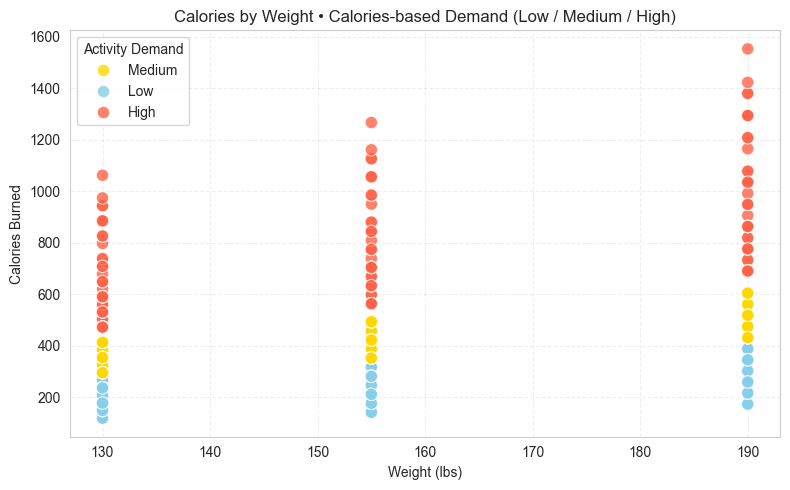

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

long_df = dhs_cal.melt(
    id_vars=["Demand3"],
    value_vars=["Calories_130_lbs", "Calories_155_lbs", "Calories_190_lbs"],
    var_name="WeightCol",
    value_name="Calories"
)

long_df["Weight"] = long_df["WeightCol"].str.extract(r"(\d+)").astype(int)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=long_df,
    x="Weight",
    y="Calories",
    hue="Demand3",
    palette={"Low": "skyblue", "Medium": "gold", "High": "tomato"},
    s=80, 
    alpha=0.8
)

plt.title("Calories by Weight • Calories-based Demand (Low / Medium / High)")
plt.xlabel("Weight (lbs)")
plt.ylabel("Calories Burned")
plt.legend(title="Activity Demand")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
